In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the dataset
print("Loading the digits dataset...")
digits = load_digits()
X = digits.data
y = digits.target


Loading the digits dataset...


In [ ]:
print(f"Dataset shape: Features {X.shape}, Target {y.shape}")


Dataset shape: Features (1797, 64), Target (1797,)


In [ ]:
print(f"Number of classes: {len(np.unique(y))}")


Number of classes: 10


In [ ]:
print(f"Feature names (pixel indices): Not typically shown, total {X.shape[1]}")


Feature names (pixel indices): Not typically shown, total 64


In [ ]:
print(f"Target names (digits): {digits.target_names}")


Target names (digits): [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Splitting the data into training and test sets
print ("Splitting the dataset into training (80%) and test (20%) sets: ")
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y) # Ensure that class proportion is the same in both train and test sets


Splitting the dataset into training (80%) and test (20%) sets: 


In [ ]:
print(f"Training set size: {X_train.shape[0]} samples")


Training set size: 1437 samples


In [ ]:
print(f"Test set size: {X_test.shape[0]} samples")


Test set size: 360 samples


In [ ]:
# Preprocessing features
print("Scaling features using StandardScaler...")
scaler = StandardScaler()


Scaling features using StandardScaler...


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Creating and configuring the SVM model
print("Initializing Support Vector Classifier (SVC)")
clf = SVC(kernel = 'rbf', # kernel='rbf': Non-linear kernel, good default for complexity.
          C = 1.0, # C=1.0: Moderate regularization strength (default).
          gamma = 'scale', # gamma='scale': Kernel coefficient that adapts based on data variance, moderate complexity.
          probability = True, # probability=True: Enables probability estimates (slightly slower training). Optional.
          random_state = 42)


Initializing Support Vector Classifier (SVC)


In [ ]:
print("Model configuration")
print(clf)


Model configuration
SVC(probability=True, random_state=42)


In [ ]:
# Training the model
clf.fit(X_train_scaled, y_train)
print("Model training complete")
print("-" * 50)


Model training complete
--------------------------------------------------


In [ ]:
# Making predictions on the test set
y_pred = clf.predict(X_test_scaled)
print("Predictions generated")
print("-" * 50)


Predictions generated
--------------------------------------------------


In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [ ]:
# Printing Classification Report
print("\nClassification Report")
target_names_str = [str(name) for name in digits.target_names]
classification_report_ = classification_report(y_test, y_pred, target_names = target_names_str)
print(classification_report_)



Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       1.00      0.91      0.96        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360




Confusion Matrix


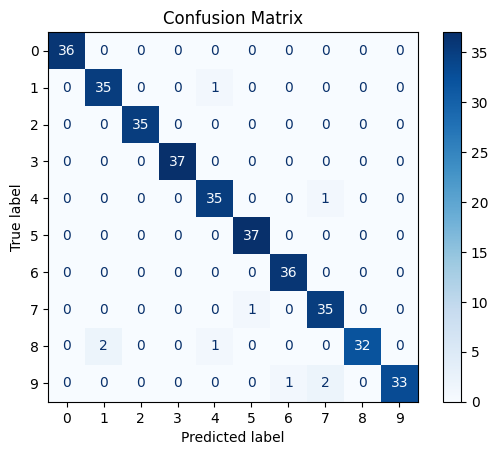

In [ ]:
# Confusion Matrix
print("\nConfusion Matrix")
confusion_matrix_ = confusion_matrix(y_test, y_pred)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_,
                                                  display_labels = target_names_str)
display_confusion_matrix.plot(cmap = plt.cm.Blues, values_format = 'd')
plt.title("Confusion Matrix")
plt.show()
